# Item Based Collaborative Filtering

[Unfold Data Science](https://www.youtube.com/watch?v=_2nES58GEHM)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Step 1 - Data Preparation

In [6]:
# Reading the data into dataframe
df_origin = pd.read_csv('u.data', sep='\t', names=['user_id', 'movieId', 'rating', 'timestamp'])
df_origin.head() # Print first five of data

,user_id,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
# Importing movie title and joining with main data
movie_titles = pd.read_csv('movies.csv', encoding='unicode_escape')
movie_titles

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [8]:
df = pd.merge(df_origin, movie_titles, on='movieId')

In [9]:
df.head()

,user_id,movieId,rating,timestamp,title,genres
0,196,242,3,881250949,Farinelli: il castrato (1994),Drama|Musical
1,63,242,3,875747190,Farinelli: il castrato (1994),Drama|Musical
2,226,242,5,883888671,Farinelli: il castrato (1994),Drama|Musical
3,154,242,3,879138235,Farinelli: il castrato (1994),Drama|Musical
4,306,242,5,876503793,Farinelli: il castrato (1994),Drama|Musical


In [10]:
df.drop('genres', axis=1, inplace=True)

In [11]:
df.head()

,user_id,movieId,rating,timestamp,title
0,196,242,3,881250949,Farinelli: il castrato (1994)
1,63,242,3,875747190,Farinelli: il castrato (1994)
2,226,242,5,883888671,Farinelli: il castrato (1994)
3,154,242,3,879138235,Farinelli: il castrato (1994)
4,306,242,5,876503793,Farinelli: il castrato (1994)


## Step 2 - Data Exploration

In [12]:
# Check statistical features of the movie
df.describe()

,user_id,movieId,rating,timestamp
count,80408.000000,80408.000000,80408.000000,8.040800e+04
mean,462.781315,390.062867,3.544498,8.835046e+08
std,267.392254,321.315923,1.119424,5.350778e+06
min,1.000000,1.000000,1.000000,8.747247e+08
25%,253.000000,168.000000,3.000000,8.794466e+08
50%,449.000000,293.000000,4.000000,8.828208e+08
75%,683.000000,521.000000,4.000000,8.882102e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [13]:
# Creating mean ratings data
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.548387
1-900 (06) (1994),3.384615
101 Dalmatians (1996),4.200000
12 Angry Men (1957),4.047619
187 (One Eight Seven) (1997),1.666667


In [14]:
# Creating number of ratings data
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.548387,31
1-900 (06) (1994),3.384615,13
101 Dalmatians (1996),4.200000,5
12 Angry Men (1957),4.047619,21
187 (One Eight Seven) (1997),1.666667,3


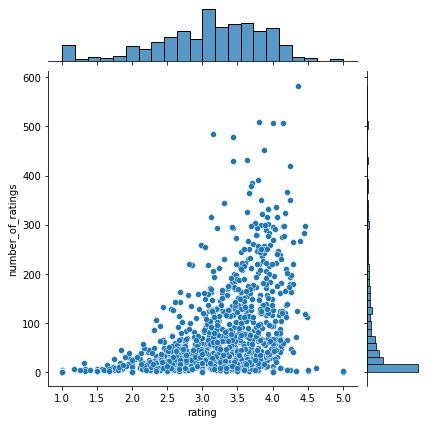

In [16]:
# Plotting the joinplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

## Creating User Interaction Matrix

In [17]:
# Creating the user-item interaction matrix
movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (06) (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (One Eight Seven) (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (8Â½) (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)","Age of Innocence, The (1993)",Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),Alice in Wonderland (1951),Alien (1979),Aliens (1986),AlienÂ³ (a.k.a. Alien 3) (1992),All About Eve (1950),...,Welcome to the Dollhouse (1995),"Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)",What Happened Was... (1994),What's Eating Gilbert Grape (1993),What's Love Got to Do with It? (1993),When Harry Met Sally... (1989),When Night Is Falling (1995),When We Were Kings (1996),When a Man Loves a Woman (1994),When the Cat's Away (Chacun cherche son chat) (1996),While You Were Sleeping (1995),"White Balloon, The (Badkonake sefid) (1995)",White Man's Burden (1995),White Squall (1996),"Whole Wide World, The (1996)",Widows' Peak (1994),Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (Les roseaux sauvages) (1994),William Shakespeare's Romeo + Juliet (1996),Willy Wonka & the Chocolate Factory (1971),"Wings of Desire (Himmel Ã¼ber Berlin, Der) (1987)",Winnie the Pooh and the Blustery Day (1968),Wishmaster (1997),With Honors (1994),Withnail & I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (Macht der Bilder: Leni Riefenstahl, Die) (1993)","World of Apu, The (Apur Sansar) (1959)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,4.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,5.0,NaN,NaN,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,

In [18]:
len(movie_matrix)

943

In [19]:
# Most rated movies
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
"Usual Suspects, The (1995)",4.358491,583
"Kid in King Arthur's Court, A (1995)",3.803536,509
City Hall (1996),4.155512,508
Mighty Morphin Power Rangers: The Movie (1995),4.007890,507
"Perez Family, The (1995)",3.156701,485
Natural Born Killers (1994),3.441423,478
Toy Story (1995),3.878319,452
Quiz Show (1994),3.631090,431
"Boys of St. Vincent, The (1992)",3.438228,429


In [20]:
# Most unrated movies
ratings.sort_values('number_of_ratings', ascending=False).tail(10)

,rating,number_of_ratings
title,,
Sliding Doors (1998),2.0,1
Playing God (1997),3.0,1
Batman & Robin (1997),1.0,1
Mad City (1997),3.0,1
Gridlock'd (1997),3.0,1
Bean (1997),2.0,1
Critical Care (1997),3.0,1
Tin Cup (1996),1.0,1
"Beautician and the Beast, The (1997)",2.0,1


## Making Recommendation

In [21]:
# Fetching ratings for toy story
toy_story_user = movie_matrix['Toy Story (1995)']

In [22]:
# Finding correlation with different movies
similar_to_toy = movie_matrix.corrwith(toy_story_user)

In [23]:
# Observing the result
similar_to_toy.head()

title
'Til There Was You (1997)       0.128415
1-900 (06) (1994)               0.686406
101 Dalmatians (1996)                NaN
12 Angry Men (1957)            -0.036084
187 (One Eight Seven) (1997)         NaN
dtype: float64

## Creating threshold for minimum number of ratings

In [24]:
# Creating dataframe to bring in of ratings
corr_toy = pd.DataFrame(similar_to_toy, columns=['Correlation'])
corr_toy.dropna(inplace=True)
corr_toy.head()

,Correlation
title,
'Til There Was You (1997),0.128415
1-900 (06) (1994),0.686406
12 Angry Men (1957),-0.036084
2 Days in the Valley (1996),0.440959
"20,000 Leagues Under the Sea (1954)",0.177881


In [26]:
# Bringing in ratings
corr_toy = corr_toy.join(ratings['number_of_ratings'])

corr_toy.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),0.128415,31
1-900 (06) (1994),0.686406,13
12 Angry Men (1957),-0.036084,21
2 Days in the Valley (1996),0.440959,10
"20,000 Leagues Under the Sea (1954)",0.177881,31


In [27]:
corr_toy[corr_toy['number_of_ratings'] > 20].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Toy Story (1995),1.000000,452
Body Snatchers (1993),0.753673,32
Sleepless in Seattle (1993),0.736826,44
My Favorite Year (1982),0.672918,46
Nelly & Monsieur Arnaud (1995),0.668410,27
Underneath (1995),0.661495,21
"Client, The (1994)",0.654585,41
Tales from the Hood (1995),0.651857,41
Citizen Kane (1941),0.641535,58
